In [33]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('Car Fuel and Emissions 2000-2013.csv',low_memory=False)
df.head()

,file,year,manufacturer,model,description,euro_standard,tax_band,transmission,transmission_type,engine_capacity,...,nox_emissions,thc_nox_emissions,particulates_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,...,NaN,NaN,NaN,NaN,618.0,NaN,NaN,NaN,NaN,NaN
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,...,NaN,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,2,NaN,M5,Manual,1970.0,...,NaN,NaN,NaN,NaN,663.0,NaN,NaN,NaN,NaN,NaN
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,NaN,M5,Manual,1598.0,...,NaN,NaN,NaN,NaN,626.0,NaN,NaN,NaN,NaN,NaN
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,NaN,M5,Manual,1747.0,...,NaN,NaN,NaN,NaN,633.0,NaN,NaN,NaN,NaN,NaN


<Axes: >

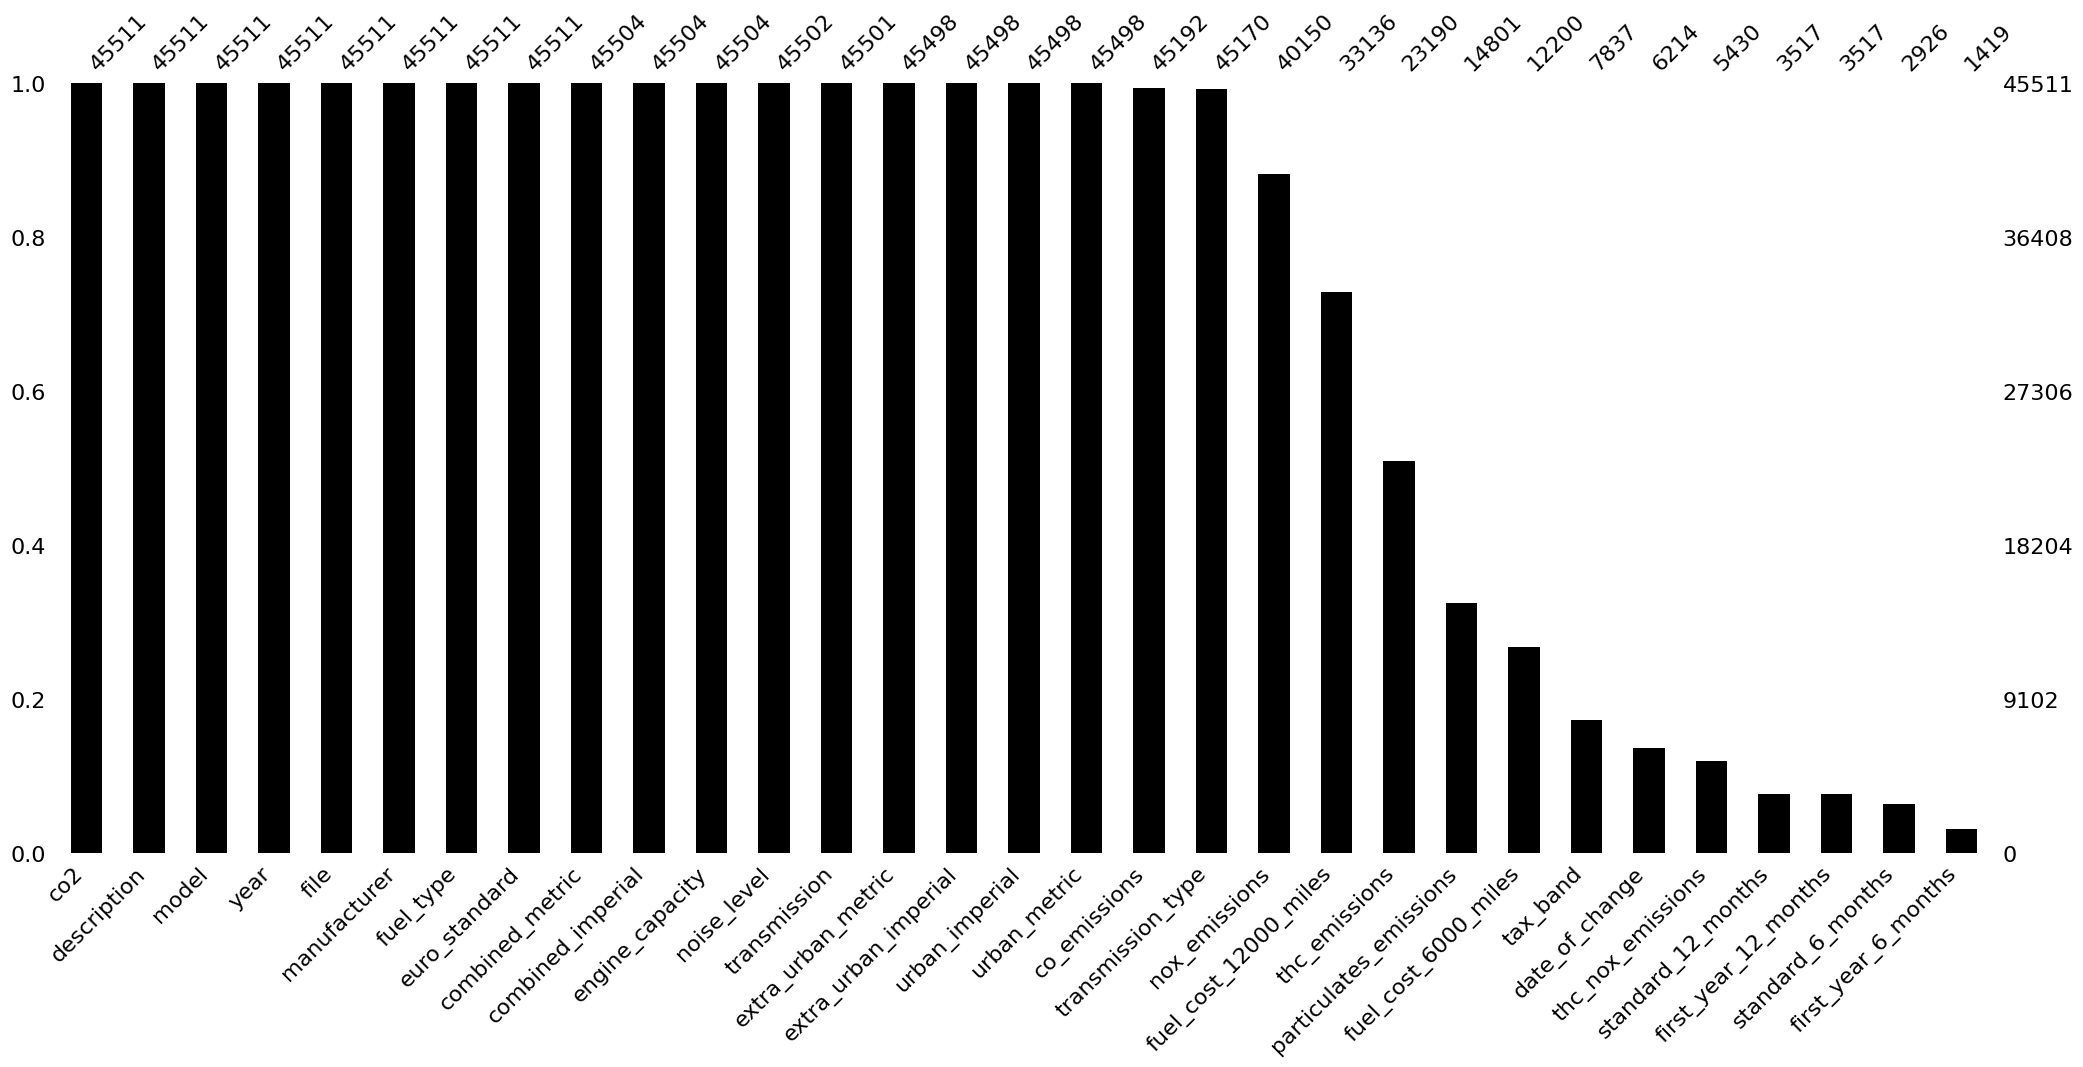

In [35]:
import missingno as mns
mns.bar(df, sort='descending', color = 'black')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45511 entries, 0 to 45510
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   file                    45511 non-null  object 
 1   year                    45511 non-null  int64  
 2   manufacturer            45511 non-null  object 
 3   model                   45511 non-null  object 
 4   description             45511 non-null  object 
 5   euro_standard           45511 non-null  int64  
 6   tax_band                7837 non-null   object 
 7   transmission            45501 non-null  object 
 8   transmission_type       45170 non-null  object 
 9   engine_capacity         45504 non-null  float64
 10  fuel_type               45511 non-null  object 
 11  urban_metric            45498 non-null  float64
 12  extra_urban_metric      45498 non-null  float64
 13  combined_metric         45504 non-null  float64
 14  urban_imperial          45498 non-null

<Axes: >

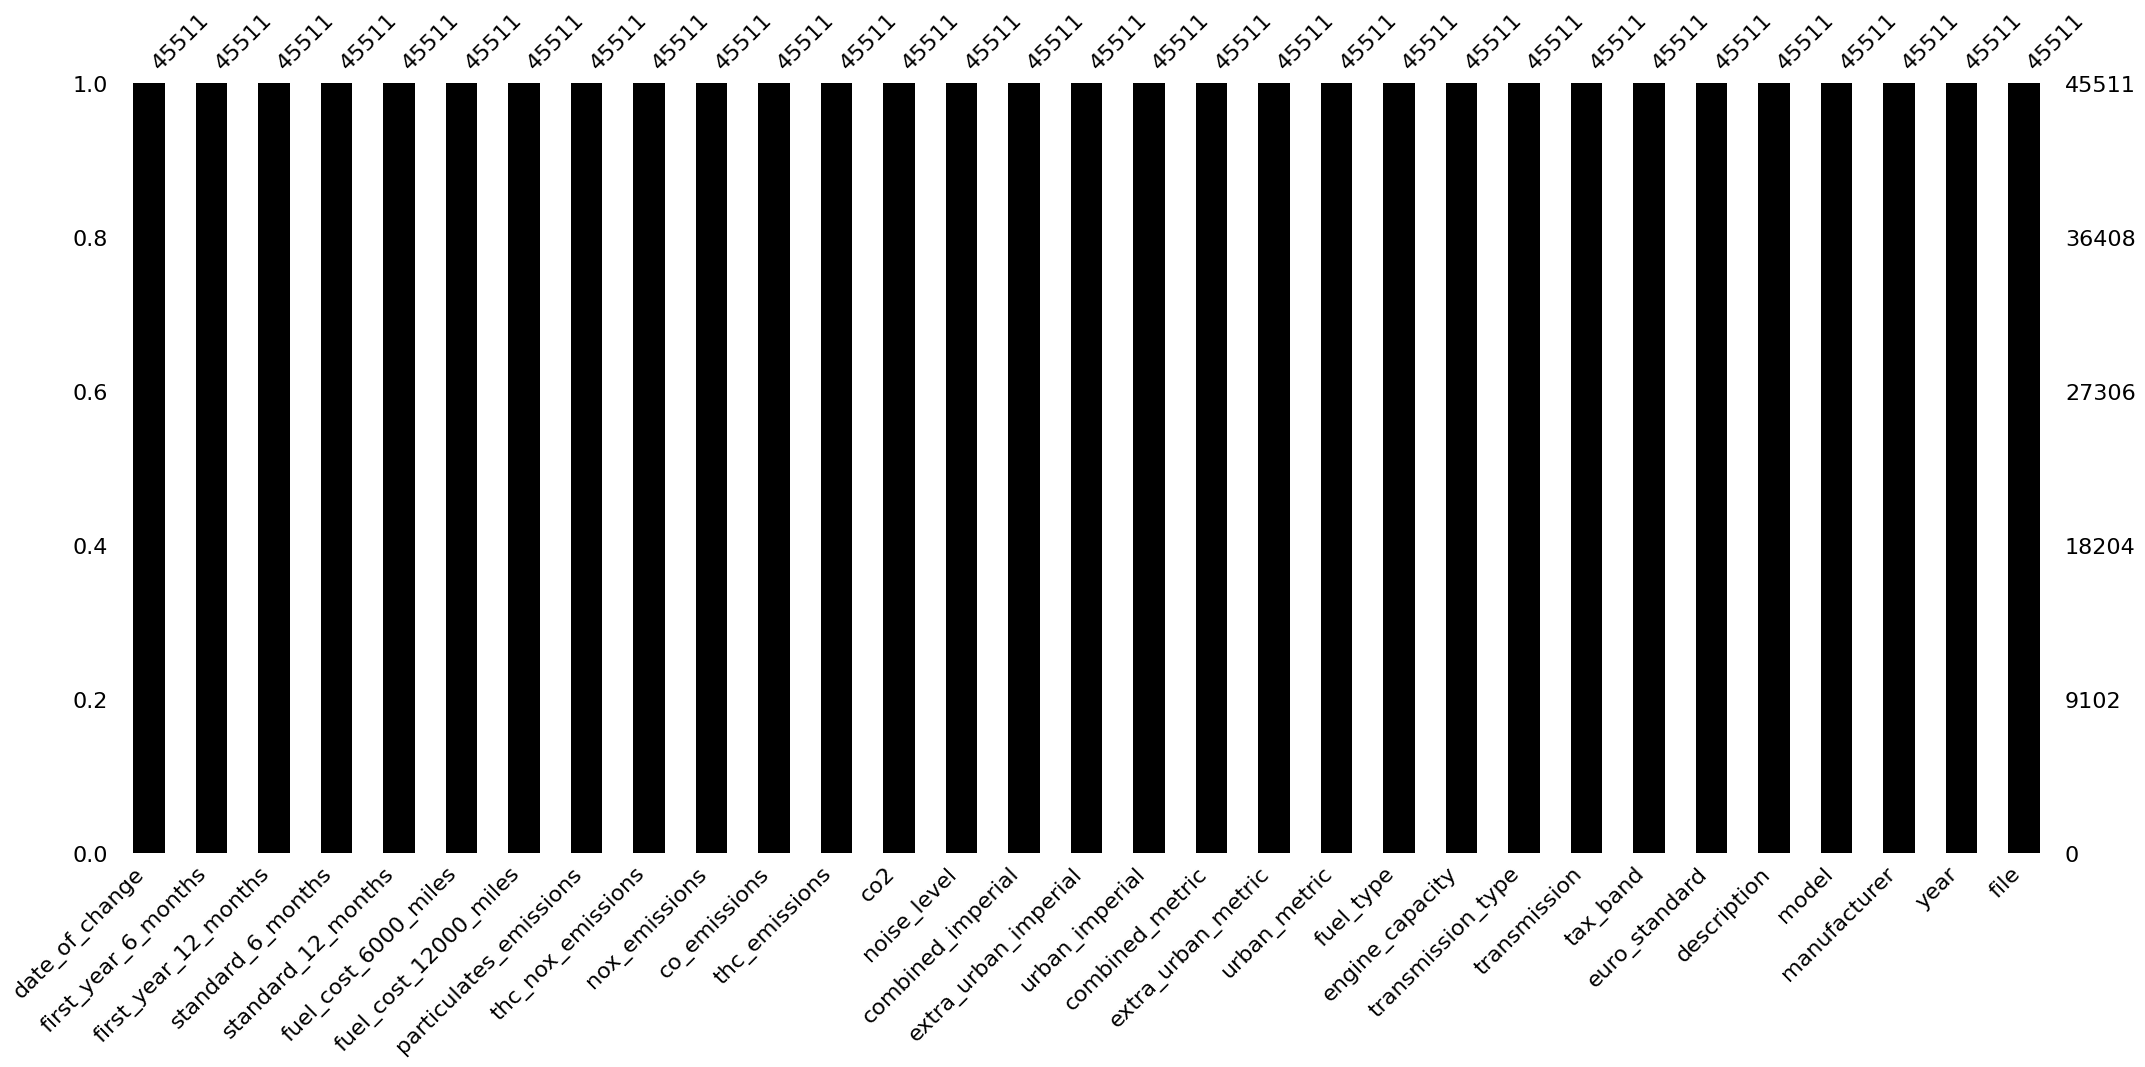

In [37]:
import warnings
warnings.filterwarnings("ignore")
category = df.select_dtypes(include=['object','category'])
numerical = df.select_dtypes(include=['int','float'])
for x in category:
    df[x].fillna(df[x].mode()[0],inplace=True)
for x in numerical:
    df[x].fillna(df[x].mean(),inplace=True)
import missingno as mns
mns.bar(df, sort='descending',color = 'black')

In [38]:
def categorize_co2E(co2):
    if co2 < 0:
        return 'Invalid'
    elif co2 <= 15000:
        return 'Low'
    elif 15000 < co2 <= 50000:
        return 'Medium'
    else:
        return 'High'
df['CO2 Emission Category'] = df['co_emissions'].apply(categorize_co2E)
df.head()

,file,year,manufacturer,model,description,euro_standard,tax_band,transmission,transmission_type,engine_capacity,...,thc_nox_emissions,particulates_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change,CO2 Emission Category
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,G,M5,Manual,1598.0,...,171.675235,3.312089,1548.09449,618.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,G,M5,Manual,1747.0,...,171.675235,3.312089,1548.09449,633.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,2,G,M5,Manual,1970.0,...,171.675235,3.312089,1548.09449,663.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,G,M5,Manual,1598.0,...,171.675235,3.312089,1548.09449,626.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,G,M5,Manual,1747.0,...,171.675235,3.312089,1548.09449,633.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low


In [39]:
df['BinaryTransmission Category'] = df['transmission_type'].apply(lambda x: 0 if 'Manual' else 1)
df.head()

,file,year,manufacturer,model,description,euro_standard,tax_band,transmission,transmission_type,engine_capacity,...,particulates_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change,CO2 Emission Category,BinaryTransmission Category
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,G,M5,Manual,1598.0,...,3.312089,1548.09449,618.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,G,M5,Manual,1747.0,...,3.312089,1548.09449,633.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,2,G,M5,Manual,1970.0,...,3.312089,1548.09449,663.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,G,M5,Manual,1598.0,...,3.312089,1548.09449,626.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,G,M5,Manual,1747.0,...,3.312089,1548.09449,633.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0


In [40]:
df.insert(loc=5, value=2023 - df['year'], column='Age of Car')
df.head()

,file,year,manufacturer,model,description,Age of Car,euro_standard,tax_band,transmission,transmission_type,...,particulates_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change,CO2 Emission Category,BinaryTransmission Category
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,23,2,G,M5,Manual,...,3.312089,1548.09449,618.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,23,2,G,M5,Manual,...,3.312089,1548.09449,633.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,23,2,G,M5,Manual,...,3.312089,1548.09449,663.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,23,2,G,M5,Manual,...,3.312089,1548.09449,626.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,23,2,G,M5,Manual,...,3.312089,1548.09449,633.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0


In [41]:
df['euro_standard'].unique()


array([2, 3, 4, 5, 6])

In [42]:
def check_compliance(euro_standard):
    if euro_standard >= 4:
        return 'Compliant'
    else:
        return 'Non-Compliant'
df['Emission Compliance'] = df['euro_standard'].apply(check_compliance)
df.head()

,file,year,manufacturer,model,description,Age of Car,euro_standard,tax_band,transmission,transmission_type,...,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change,CO2 Emission Category,BinaryTransmission Category,Emission Compliance
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,23,2,G,M5,Manual,...,1548.09449,618.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non-Compliant
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,23,2,G,M5,Manual,...,1548.09449,633.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non-Compliant
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,23,2,G,M5,Manual,...,1548.09449,663.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non-Compliant
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,23,2,G,M5,Manual,...,1548.09449,626.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non-Compliant
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,23,2,G,M5,Manual,...,1548.09449,633.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non-Compliant


In [43]:
df['Cost Per Mile_Using_FUEL_COST_FOR_12000miles'] = df['fuel_cost_12000_miles']/12000
df.head()

,file,year,manufacturer,model,description,Age of Car,euro_standard,tax_band,transmission,transmission_type,...,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change,CO2 Emission Category,BinaryTransmission Category,Emission Compliance,Cost Per Mile_Using_FUEL_COST_FOR_12000miles
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,23,2,G,M5,Manual,...,618.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non-Compliant,0.129008
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,23,2,G,M5,Manual,...,633.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non-Compliant,0.129008
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,23,2,G,M5,Manual,...,663.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non-Compliant,0.129008
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,23,2,G,M5,Manual,...,626.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non-Compliant,0.129008
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,23,2,G,M5,Manual,...,633.0,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non-Compliant,0.129008


In [44]:
# Engine Size Category: How would you categorize cars into small, medium and large based on engine capacity?

In [45]:
def cat(engine_capacity):
    if engine_capacity <=1999:
        return 'small'
    elif 2000 <= engine_capacity <= 4999:
        return 'Medium'
    else:
        return 'Large'
df['Engine Size Category'] = df['engine_capacity'].apply(cat)
df.head()

,file,year,manufacturer,model,description,Age of Car,euro_standard,tax_band,transmission,transmission_type,...,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change,CO2 Emission Category,BinaryTransmission Category,Emission Compliance,Cost Per Mile_Using_FUEL_COST_FOR_12000miles,Engine Size Category
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,23,2,G,M5,Manual,...,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non-Compliant,0.129008,small
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,23,2,G,M5,Manual,...,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non-Compliant,0.129008,small
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,23,2,G,M5,Manual,...,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non-Compliant,0.129008,small
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,23,2,G,M5,Manual,...,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non-Compliant,0.129008,small
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,23,2,G,M5,Manual,...,165.612738,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non-Compliant,0.129008,small


In [46]:
# Total Emissions: can you create a column that sums up all the emission types


In [47]:
df['Total Emissions'] = df['thc_emissions'] + df['co_emissions'] + df['nox_emissions'] + df['thc_nox_emissions'] + df['particulates_emissions']
df.head()

,file,year,manufacturer,model,description,Age of Car,euro_standard,tax_band,transmission,transmission_type,...,standard_6_months,first_year_12_months,first_year_6_months,date_of_change,CO2 Emission Category,BinaryTransmission Category,Emission Compliance,Cost Per Mile_Using_FUEL_COST_FOR_12000miles,Engine Size Category,Total Emissions
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,23,2,G,M5,Manual,...,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non-Compliant,0.129008,small,1344.678209
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,23,2,G,M5,Manual,...,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non-Compliant,0.129008,small,1469.678209
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,23,2,G,M5,Manual,...,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non-Compliant,0.129008,small,1467.678209
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,23,2,G,M5,Manual,...,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non-Compliant,0.129008,small,1344.678209
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,23,2,G,M5,Manual,...,107.159774,231.558146,78.872093,01 July 2001,Low,0,Non-Compliant,0.129008,small,1469.678209


In [48]:
df['Combined Consumption Difference'] = df['combined_imperial'] - df['combined_metric']
df.head()

,file,year,manufacturer,model,description,Age of Car,euro_standard,tax_band,transmission,transmission_type,...,first_year_12_months,first_year_6_months,date_of_change,CO2 Emission Category,BinaryTransmission Category,Emission Compliance,Cost Per Mile_Using_FUEL_COST_FOR_12000miles,Engine Size Category,Total Emissions,Combined Consumption Difference
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,23,2,G,M5,Manual,...,231.558146,78.872093,01 July 2001,Low,0,Non-Compliant,0.129008,small,1344.678209,26.2
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,23,2,G,M5,Manual,...,231.558146,78.872093,01 July 2001,Low,0,Non-Compliant,0.129008,small,1469.678209,25.2
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,23,2,G,M5,Manual,...,231.558146,78.872093,01 July 2001,Low,0,Non-Compliant,0.129008,small,1467.678209,23.3
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,23,2,G,M5,Manual,...,231.558146,78.872093,01 July 2001,Low,0,Non-Compliant,0.129008,small,1344.678209,25.7
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,23,2,G,M5,Manual,...,231.558146,78.872093,01 July 2001,Low,0,Non-Compliant,0.129008,small,1469.678209,25.2


In [49]:
avergae_coe_year = df.groupby('year')['co_emissions'].mean()
avergae_coe_year

year
2000    565.670380
2001    545.397509
2002    510.209202
2003    443.983805
2004    474.173918
2005    557.337826
2006    353.946735
2007    308.885232
2008    304.627850
2009    294.435446
2010    287.194482
2011    294.540962
2012    291.501564
2013    286.664027
Name: co_emissions, dtype: float64

In [50]:
df['manufacturer'].value_counts()


manufacturer
Mercedes-Benz    5836
Vauxhall         4139
Volkswagen       3593
BMW              2943
Ford             2916
                 ... 
Dacia               9
McLaren             8
MG Motors Uk        8
Tata                7
MG Motors UK        5
Name: count, Length: 62, dtype: int64

In [51]:
median_fuel_efficiency = df.groupby('year')['combined_metric'].median()
median_fuel_efficiency

year
2000    8.60
2001    8.50
2002    8.50
2003    8.10
2004    8.30
2005    7.80
2006    7.85
2007    7.70
2008    7.50
2009    7.20
2010    6.90
2011    6.40
2012    6.00
2013    5.80
Name: combined_metric, dtype: float64

In [52]:
df['transmission_type'].count()

np.int64(45511)

In [53]:
df['transmission_type'].value_counts()

transmission_type
Manual       27122
Automatic    18389
Name: count, dtype: int64

In [54]:
proportion_of_auto_cars = (18389/45511) * 100
proportion_of_auto_cars

40.40561622464899

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45511 entries, 0 to 45510
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   file                                          45511 non-null  object 
 1   year                                          45511 non-null  int64  
 2   manufacturer                                  45511 non-null  object 
 3   model                                         45511 non-null  object 
 4   description                                   45511 non-null  object 
 5   Age of Car                                    45511 non-null  int64  
 6   euro_standard                                 45511 non-null  int64  
 7   tax_band                                      45511 non-null  object 
 8   transmission                                  45511 non-null  object 
 9   transmission_type                             45511 non-null 

In [56]:
average_engine_capacity_by_fuel_type = df.groupby('fuel_type')['engine_capacity'].mean()
average_engine_capacity_by_fuel_type

fuel_type
CNG                         2391.354839
Diesel                      2076.993755
Diesel Electric             2050.090909
Electricity                 2182.770526
Electricity/Diesel          2400.000000
Electricity/Petrol          1478.000000
LPG                         1996.673469
LPG / Petrol                1701.846154
Petrol                      2249.197639
Petrol / E85                2033.166667
Petrol / E85 (Flex Fuel)    2526.404412
Petrol Electric             2379.941176
Petrol Hybrid               2265.129771
Name: engine_capacity, dtype: float64

In [57]:
emissions_by_euro_standard = df.groupby('co_emissions').sum()['euro_standard']
emissions_by_euro_standard

co_emissions
-200.000       3
 0.070         4
 0.091         4
 0.200        12
 0.270         4
              ..
 71000.000     3
 72000.000     3
 73000.000     6
 74000.000     6
 75000.000     3
Name: euro_standard, Length: 1511, dtype: int64

In [58]:
avg_noise_level = df['noise_level'].mean()
avg_noise_level

np.float64(72.1414366401477)

In [59]:
df['tax_band'].count()

np.int64(45511)

In [60]:
df['tax_band'].value_counts()

tax_band
G    38796
E     1091
F      927
D      874
C      854
H      508
J      479
B      379
K      367
I      345
A      334
M      322
L      235
Name: count, dtype: int64

In [61]:
Proportion_of_cars_with_Missing_Tax_Band = df['tax_band'].isnull().mean()
Proportion_of_cars_with_Missing_Tax_Band

np.float64(0.0)

In [32]:
df.groupby('manufacturer')['tax_band']

In [ ]:
df['first_year_12_months'].median()

231.55814614728462

In [ ]:
df['particulates_emissions'].sum()

150736.47851550573

<Axes: >

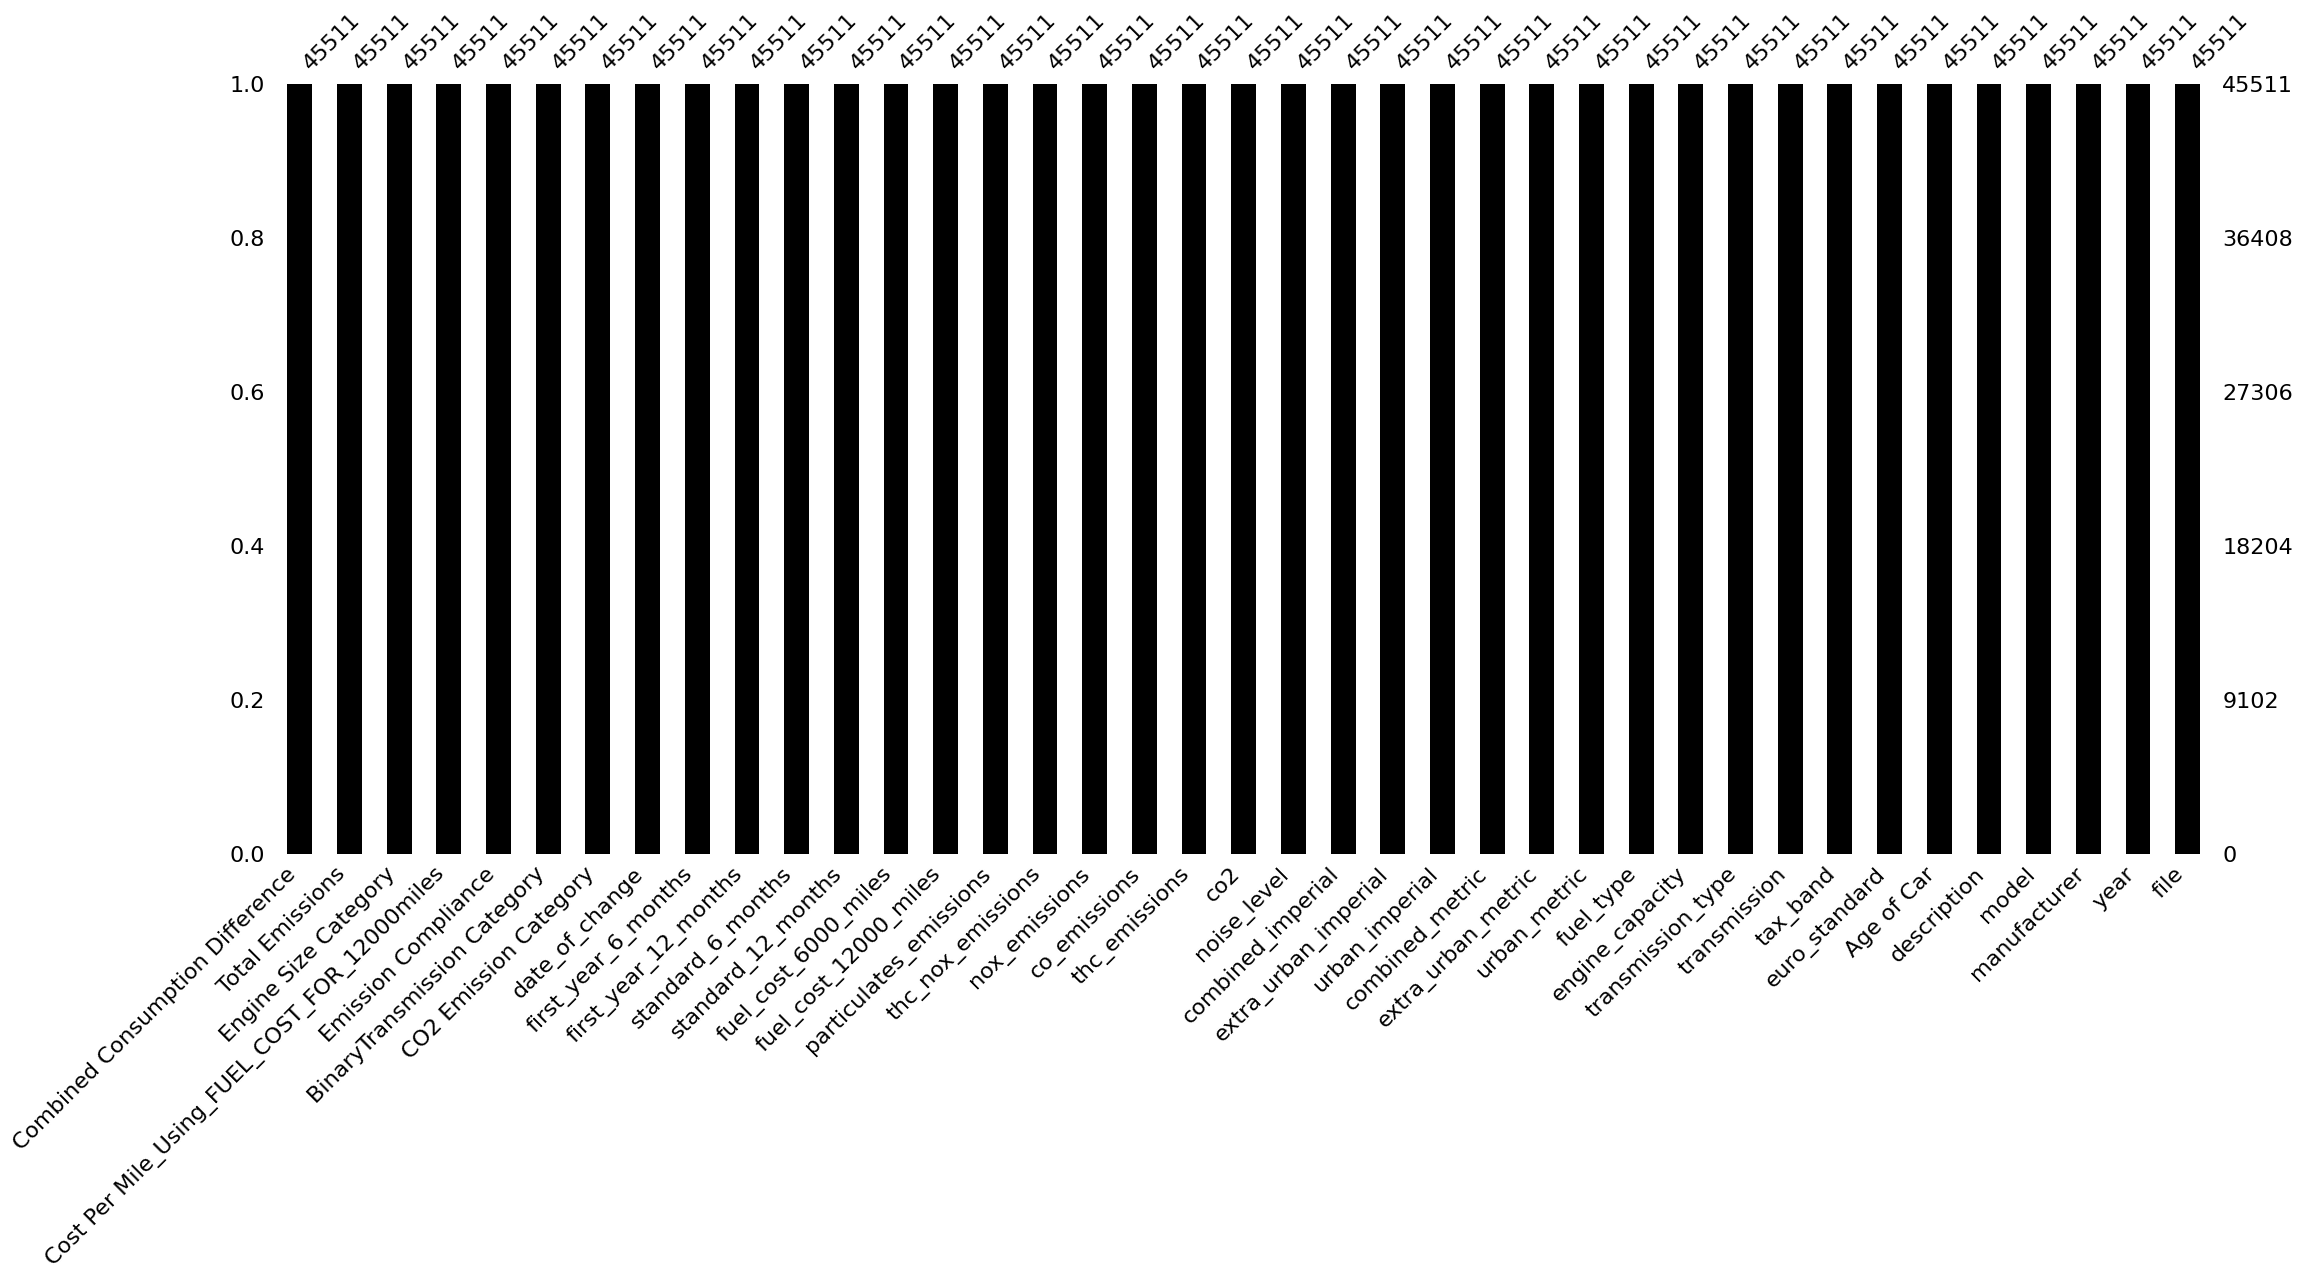

In [62]:
import missingno as mns
mns.bar(df, sort='descending', color = 'black')